In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(r"C:\Users\MICHEAL\OneDrive\Documents\usa_county_wise.csv")

data

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627915,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",7/27/20,347,1
627916,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",7/27/20,70,0
627917,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",7/27/20,2781,23
627918,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",7/27/20,142,0


Relating the variables with scatterplots

c:\Users\MICHEAL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\MICHEAL\AppData\Local\Temp\ipykernel_15152\3878546011.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 800x1000 with 0 Axes>

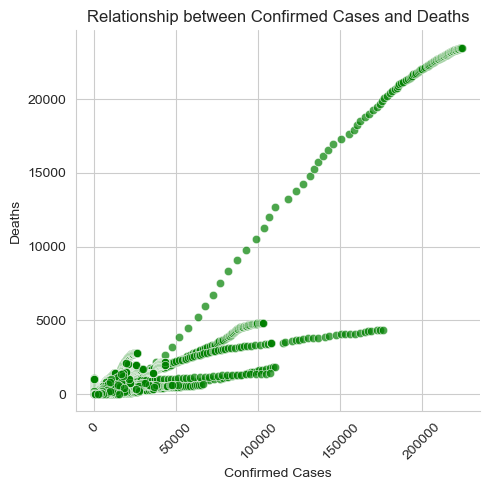

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,10))
sns.relplot(x="Confirmed", y="Deaths", data=data, alpha=0.7, color='green')
plt.title("Relationship between Confirmed Cases and Deaths")
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()

Create the time series plot

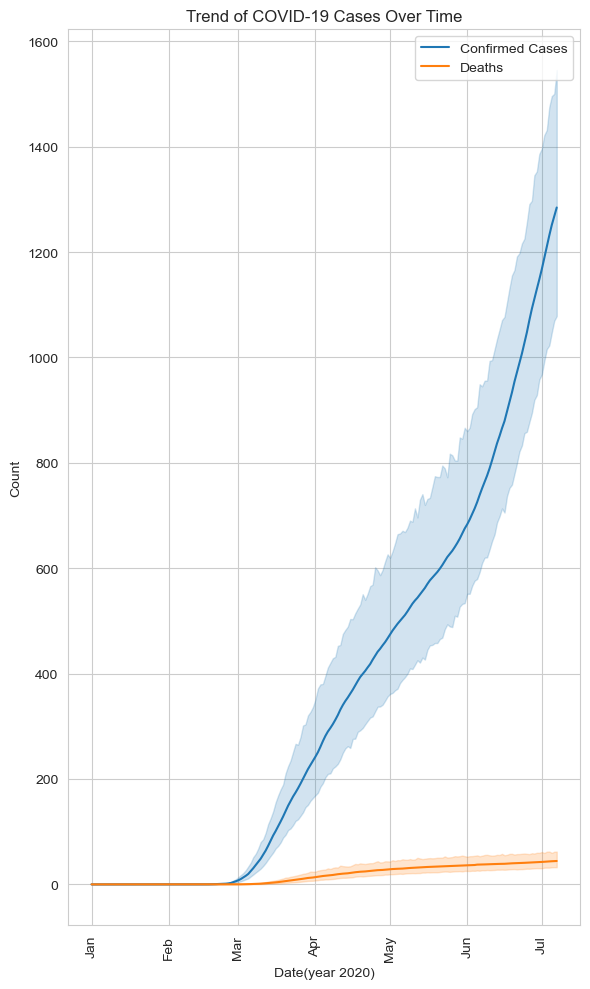

In [23]:
import matplotlib.dates as mdates

#sns.set_style("whitegrid")
plt.figure(figsize=(6,10))
sns.lineplot(x="Date",y="Confirmed", data=data, markers='o', markersize=2, label='Confirmed Cases')
sns.lineplot(x="Date",y="Deaths", data =data, markers='o',markersize=2,label="Deaths")
plt.title("Trend of COVID-19 Cases Over Time")
plt.xlabel('Date(year 2020)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.tight_layout()
plt.legend()
plt.show()

Bar chart comparing the total Confirmed or Deaths in different Province State.

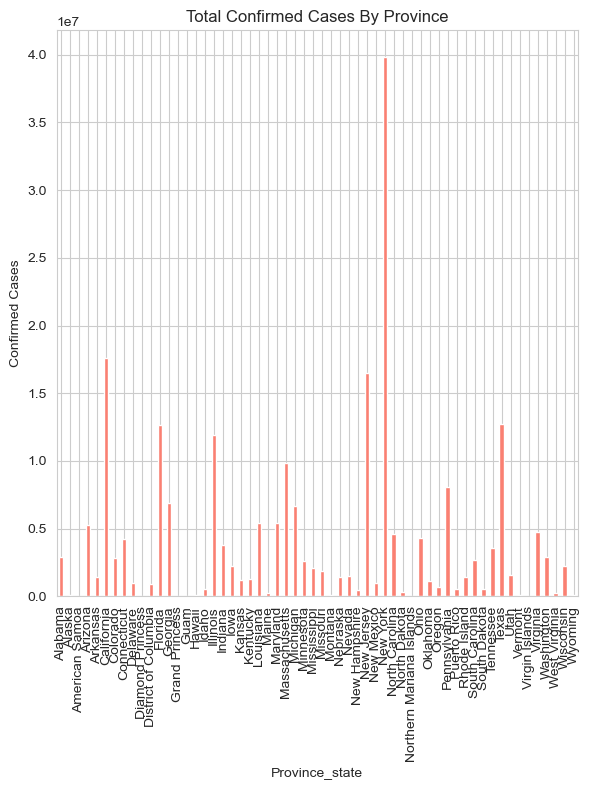

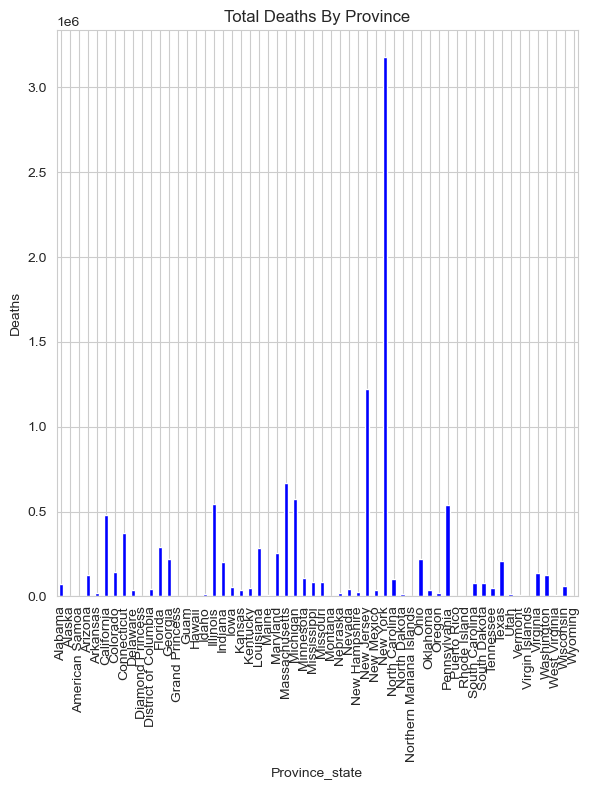

In [57]:
plt.figure(figsize=(6,8))
total_cases_by_country = data.groupby('Province_State')['Confirmed'].sum()
total_cases_by_country.plot(kind='bar', color='salmon')
plt.title("Total Confirmed Cases By Province")
plt.ylabel('Confirmed Cases')
plt.xlabel('Province_state')
plt.xticks(range(len(total_deaths_by_country.index))[::1], total_cases_by_country.index[::1], rotation=90)
plt.tight_layout()
plt.show()


plt.figure(figsize=(6,8))
total_deaths_by_country = data.groupby('Province_State')['Deaths'].sum()
total_deaths_by_country.plot(kind="bar", color="blue")
plt.title("Total Deaths By Province")
plt.ylabel('Deaths')
plt.xlabel('Province_state')
plt.xticks(range(len(total_deaths_by_country.index))[::1], total_deaths_by_country.index[::1], rotation=90)
plt.tight_layout()
plt.show()


Plotting the data on a map using Lat and Long_ to show the geographic distribution of cases.

In [59]:
pip install folium


  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b9/98/9ba4b9d2d07dd32765ddb4e4c189dcbdd7dca4d5a735e2e4ea756f40c36b/folium-0.16.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/75/ca/6074ab4a04dd1a503201c18091b3426f3709670115fae316907a97f98d75/branca-0.7.2-py3-none-any.whl.metadata
Using cached folium-0.16.0-py2.py3-none-any.whl (100 kB)
Using cached branca-0.7.2-py3-none-any.whl (25 kB)
Note: you may need to restart the kernel to use updated packages.
